Chargement des Bibliotheques Instalées sur l'environnement virtuel

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import joblib # Pour stocker le modèle


Importation des données d'entraînement depuis le repo github https://github.com/Yobapatrick/classification_diabete.git




La base de données "Diabete" est disponible sur Kaggle. Cette base de données contient des informations sur des patientes  qui ont été examinées pour déterminer s'ils avaient un diabète de type 2. Les caractéristiques incluent des mesures telles que la taille, le poids, l'âge, le nombre de grossesses, la pression artérielle, etc.


La base de données contient les colonnes suivantes :

    Pregnancies : nombre de grossesses
    Glucose : concentration de glucose dans le plasma sanguin à jeun
    BloodPressure : pression artérielle diastolique (mm Hg)
    SkinThickness : épaisseur du pli cutané tricipital (mm)
    Insulin : taux d'insuline sérique de 2 heures (mu U/ml)
    BMI : indice de masse corporelle (kg/m²)
    DiabetesPedigreeFunction : fonction pedigree du diabète
    Age : âge (années)
    Outcome : variable cible indiquant si le patient est diabétique (0 = non diabétique, 1 = diabétique)


In [5]:
!git clone https://github.com/Yobapatrick/classification_diabete.git

import pandas as pd

diabete= pd.read_csv("classification_diabete/Data/Diabete.csv")
diabete.head()


fatal: destination path 'classification_diabete' already exists and is not an empty directory.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Affichage des informations générales sur le DataFrame
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB


Nettoyage des données d'entraînement

In [8]:
diabete=diabete.rename(columns={
    'Pregnancies':'Grossesses',
    'Glucose':'ConcentrationGlucose',
    'BloodPressure':'PressionArterielle',
    'SkinThickness':'EpaisseurPli',
    'Insulin':'TauxInsuline',
    'BMI':'IndiceMasse',
    'DiabetesPedigreeFunction':'FonctionPedigree'})
diabete.head()

,Grossesses,ConcentrationGlucose,PressionArterielle,EpaisseurPli,TauxInsuline,IndiceMasse,FonctionPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Préparation des données pour le modèle :

-Diviser la base de données en deux (20% test et 80%entraînement)
Modélisation Random Forest(forêt aléatoire)


In [11]:
from sklearn.model_selection import train_test_split

X = diabete.drop('Outcome', axis=1)  # Variables prédictives
y = diabete['Outcome']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Calculer le nombre maximum de variables (max_features) à la racine carrée
max_features = int(np.sqrt(X.shape[1]))

# Créer la forêt aléatoire
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)

# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [15]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                      1.0          0.997967
1       AUC                      1.0          0.997326
2    Recall                      1.0          0.994652


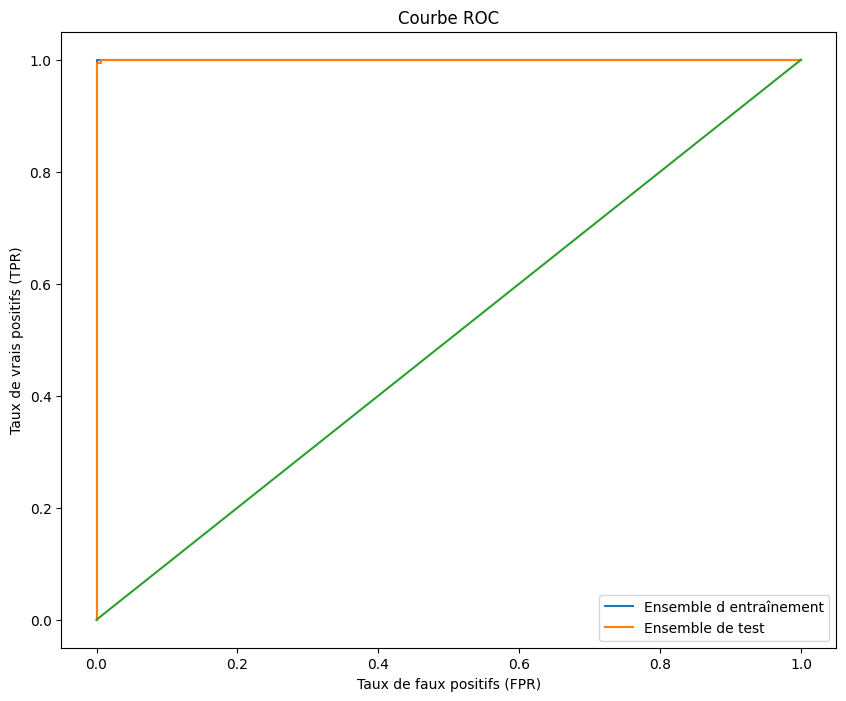

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))
plt.plot(train_fpr, train_tpr, label='Ensemble d entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()